# Package Prerequisites

* ``` conda install sklearn ```
* ``` conda install numpy ```
* ``` conda install matplotlib ```
* ``` conda install scipy ```

In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering

In [2]:
#REHS 2020
#Created by: Dhruv Kumar

In this tutorial, we will be going over some basic clustering methods and how to implement them in python. 

# K-means

We will create a dataset of 500 points in a 2-Dimentional space in 4 clusters

In [3]:
# make blobs
data = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1.2, random_state=50)

In [4]:
# create np array for data points
points = data[0]
xvals = points[:,0]
yvals = points[:,1]
cluster_num = data[1]

Now we plot the points in the 2D space. They are colored based on which cluster they are in

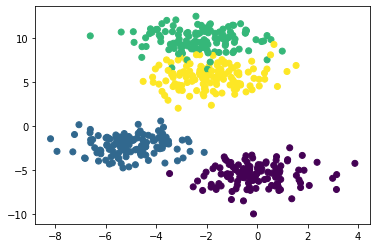

In [5]:
# create scatter plot
plt.scatter(xvals, yvals, c=cluster_num, cmap='viridis')
plt.show()

In k-means, we first place 4 random cluster centroids, the algorithm does the following untill convergence:
* calculated the disctance of each point to the K centroids and assigns itself to the closest centroid
* the poistion of the centroid is recalcualated by taking hte mean of the points in the cluster

In [6]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(points)
y_kmeans = kmeans.predict(points)

Now we plot the points in a 2D space. The points are colored by the cluster the Kmeans algorithm has clustered them into. The red dots represent the center of the clusters

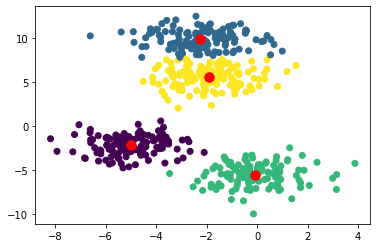

In [7]:
plt.scatter(xvals, yvals, c = y_kmeans)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'red', s = 90);
plt.show()

# Agglomerative Hierarchical Clustering

We have 15 data points with 3 clusters. These data points are stored in the data_H array

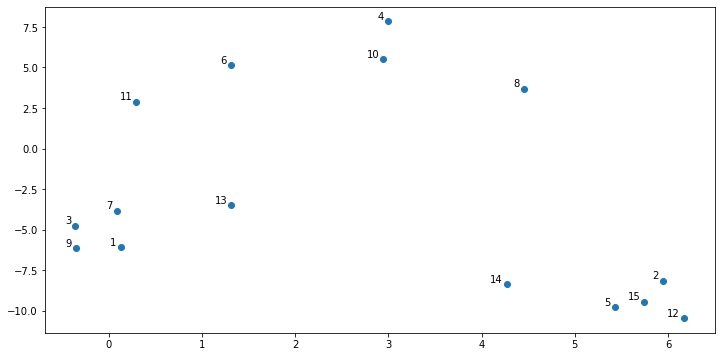

In [8]:
data_H = make_blobs(n_samples=15, n_features=2, centers=3, cluster_std=1.2, random_state=10)[0]

plt.figure(figsize = (12, 6))
labels = range(1,len(data_H)+1)
plt.scatter(data_H[:,0], data_H[:,1])
for label, xval, yval in zip(labels, data_H[:, 0], data_H[:, 1]):
    plt.annotate(label,xy = (xval, yval), xytext = (-4, 0),textcoords = 'offset points', ha = 'right', va = 'bottom')
plt.show()

Now we will create a dendrogram of the data. Those grouped lower down are more similar (such as 1 and 9)

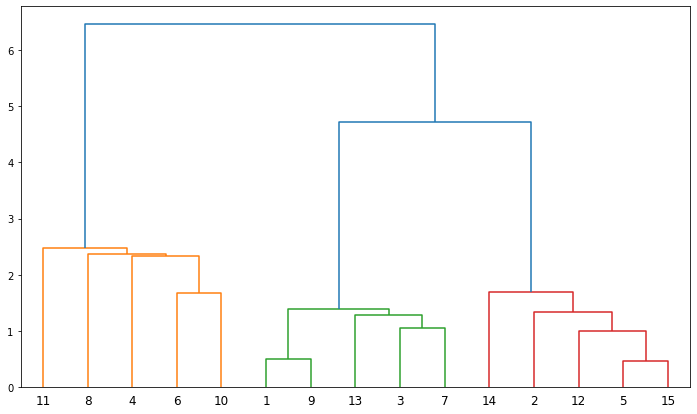

In [9]:
linked = linkage(data_H, 'single')
plt.figure(figsize = (12, 7))
dendrogram(linked, orientation = 'top',labels = labels, 
   distance_sort ='descending',show_leaf_counts = True)
plt.show()

Next, we will cluster the data points using AgglomerativeClustering from sklearn. 
Note that the clustering shows the same members in each cluster as the dendrogram above

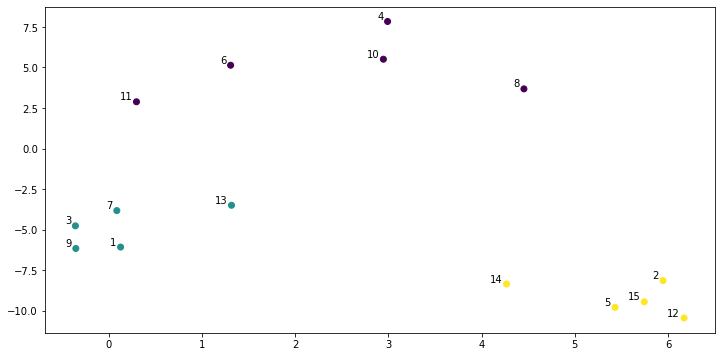

In [10]:
cluster = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
cluster.fit_predict(data_H)
plt.figure(figsize = (12, 6))
plt.scatter(data_H[:,0],data_H[:,1], c = cluster.labels_)
for label, xval, yval in zip(labels, data_H[:, 0], data_H[:, 1]):
    plt.annotate(label,xy = (xval, yval), xytext = (-4, 0),textcoords = 'offset points', ha = 'right', va = 'bottom')
plt.show()